### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [6]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [8]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [9]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
2202,0,1,0,0,0
3117,0,1,0,0,0
1146,0,1,0,0,0
3947,0,0,0,1,0
1951,0,0,0,1,0
...,...,...,...,...,...
1039,0,1,0,0,0
3281,0,0,1,0,0
1664,0,0,0,1,0
2621,1,0,0,0,0


In [12]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# le.fit_transform(df['effectiveness'])

In [10]:
my_effectiveness = {
    "Ineffective": 0,
    "Marginally Effective": 1,
    "Moderately Effective": 2,
    "Considerably Effective": 3,
    "Highly Effective": 4
}

df['effectiveness_int'] = df['effectiveness'].map(my_effectiveness)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [14]:
my_sideEffects = {
    "No Side Effects": 0,
    "Mild Side Effects": 1,
    "Moderate Side Effects": 2,
    "Severe Side Effects": 3,
    "Extremely Severe Side Effects": 4
}

df['sideEffects_int'] = df['sideEffects'].map(my_sideEffects)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [15]:
X = df[['rating', 'effectiveness_int', 'sideEffects_int']]
print(X.shape)

(3107, 3)


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
km_list = [KMeans(n_clusters=k, n_init=10, random_state=10).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, n_init=10, random_state=10),
 KMeans(n_clusters=3, n_init=10, random_state=10),
 KMeans(n_clusters=4, n_init=10, random_state=10),
 KMeans(n_clusters=5, n_init=10, random_state=10),
 KMeans(n_clusters=6, n_init=10, random_state=10),
 KMeans(n_clusters=7, n_init=10, random_state=10),
 KMeans(n_init=10, random_state=10),
 KMeans(n_clusters=9, n_init=10, random_state=10),
 KMeans(n_clusters=10, n_init=10, random_state=10),
 KMeans(n_clusters=11, n_init=10, random_state=10),
 KMeans(n_clusters=12, n_init=10, random_state=10),
 KMeans(n_clusters=13, n_init=10, random_state=10),
 KMeans(n_clusters=14, n_init=10, random_state=10),
 KMeans(n_clusters=15, n_init=10, random_state=10),
 KMeans(n_clusters=16, n_init=10, random_state=10),
 KMeans(n_clusters=17, n_init=10, random_state=10),
 KMeans(n_clusters=18, n_init=10, random_state=10),
 KMeans(n_clusters=19, n_init=10, random_state=10),
 KMeans(n_clusters=20, n_init=10, random_state=10),
 KMeans(n_clusters=21, n_init=10, 

In [18]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[0.6190969508782411,
 0.4541665291694327,
 0.416701237123931,
 0.4152173517501398,
 0.4079128458897816,
 0.40450806796633776,
 0.3908346735692302,
 0.398768491837093,
 0.40215227039617046,
 0.4199045532738677,
 0.4060963956571024,
 0.439078396495516,
 0.41618904288780756,
 0.46333871388881,
 0.4642657754822303,
 0.49767979686043484,
 0.4924141014568427,
 0.48756037758111553,
 0.5052140192369712,
 0.5131695706179485,
 0.5599455460128788,
 0.551783425696726,
 0.5791004609314715,
 0.5700098212450442,
 0.5867133101198798,
 0.6136160707573348,
 0.5928228630242552,
 0.6106328643158141]

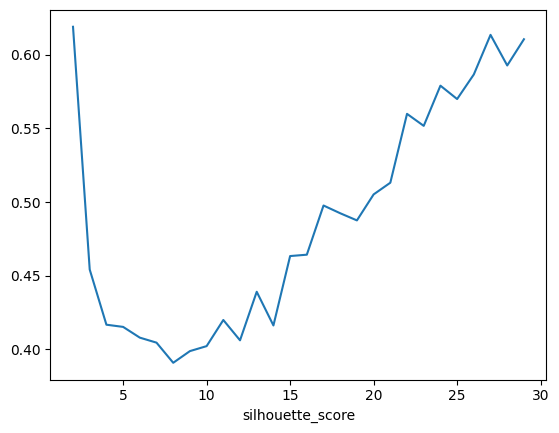

In [20]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel('K')
plt.xlabel('silhouette_score');

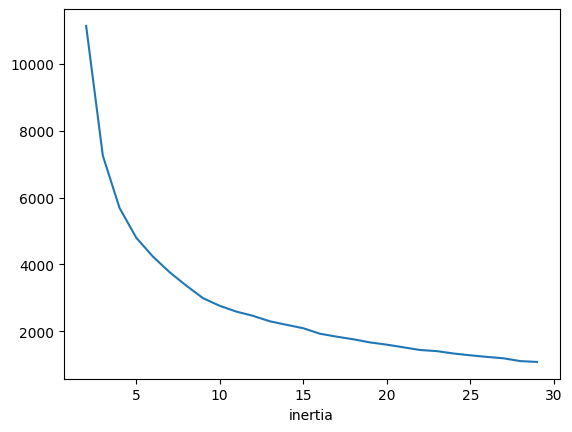

In [21]:
inertias = [model.inertia_ for model in km_list]
plt.plot(range(2,30), inertias)
plt.xlabel('K')
plt.xlabel('inertia');

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [36]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=10).fit(X)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [37]:
df_cluster = X.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster

,rating,effectiveness_int,sideEffects_int,cluster
2202,4,4,1,1
3117,1,4,3,1
1146,10,4,0,0
3947,3,1,1,1
1951,2,1,3,1
...,...,...,...,...
1039,10,4,1,0
3281,1,0,4,1
1664,2,1,2,1
2621,8,3,1,0


In [33]:
df_cluster['cluster'].value_counts()

0    1202
2     946
3     410
1     334
4     215
Name: cluster, dtype: int64

<Axes: ylabel='cluster'>

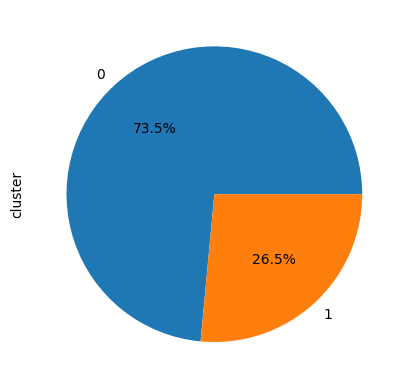

In [38]:
df_cluster['cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [29]:
pd.set_option("display.max_columns", 100)

In [39]:
df_cluster.groupby('cluster').describe()

rating                                                 \
          count      mean       std  min  25%  50%   75%   max   
cluster                                                          
0        2284.0  8.569615  1.272701  5.0  8.0  9.0  10.0  10.0   
1         823.0  2.667072  1.570244  1.0  1.0  3.0   4.0   6.0   

        effectiveness_int                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster                                                                  
0                  2284.0  3.422504  0.708896  1.0  3.0  4.0  4.0  4.0   
1                   823.0  1.584447  1.356197  0.0  0.0  1.0  3.0  4.0   

        sideEffects_int                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster                                                               
0                2284.0  0.880473  0.838299  0.0  0.0  1.0  1.0  4.0  
1                 823.0  2.482382  1.182545  0.0  2.0  3.0  3.0  4.0